In [1]:
from utils import list_change
import pandas as pd
import numpy as np
import glob
from keras import Sequential
from keras.layers import LSTM, Dense
import copy
import matplotlib.pyplot as plt
from utils import split_dataset, restore_changes
import os
import tensorflow as tf
import cv2
import utils

2024-09-05 19:10:10.934733: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-05 19:10:11.059755: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-05 19:10:11.059829: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-05 19:10:11.080316: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-05 19:10:11.138139: I tensorflow/core/platform/cpu_feature_guar

In [2]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')
# print(tf.__version__)
# tf.test.is_gpu_available()

2024-09-05 19:10:13.443520: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-05 19:10:13.449001: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-05 19:10:13.449035: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
# def formating(X, Y):
#     x_test = []
#     y_test = []
#     for x, y in zip(X, Y):
#         x_test+=x[0].tolist()
#         y_test+=y[0].tolist()
#     return np.array(x_test), np.array(y_test)
def formating(X, Y):
    x_test = []
    y_test = []
    for x, y in zip(X, Y):
        x_test+=x.tolist()
        y_test+=y.tolist()
    return np.array(x_test), np.array(y_test)

In [5]:
# data=[]
# for _dir in glob.glob('CutFrame_Output/output*/'):
#     data.append([list_change(f) for f in glob.glob(_dir+'use*.txt')])
# data = np.array(data)
# utils.save_obj(data,'data')
data = utils.load_obj('data')

In [6]:
len(data)

149

In [7]:
data = data.reshape(len(data),7,6)  #  7 frames 不可随意更改

In [8]:
print(data[0])

[[ 828.  635.  918.  512.  612. 1025.]
 [ 625.  676.  738.  597.  597. 1046.]
 [ 518.  740.  440.  779.  565. 1046.]
 [ 488.  821.  390.  884.  527. 1035.]
 [ 488.  880.  471.  908.  508. 1015.]
 [ 449.  817.  312.  890.  543. 1048.]
 [ 558.  689.  660.  582.  591. 1004.]]


In [147]:
# dataf = [pd.DataFrame(i,copy=True) for i in data]
# dataf

In [148]:
X = copy.deepcopy(data)
Y = copy.deepcopy(data)
X = np.array([np.delete(i, -1, axis=0) for i in X])
Y = np.array([np.delete(i, 0, axis=0) for i in Y])
# X = np.delete(X, -1, axis=0)
# Y = np.delete(Y, 0, axis=0)

In [149]:
print(list(zip(X,Y)))

[(array([[ 828.,  635.,  918.,  512.,  612., 1025.],
       [ 625.,  676.,  738.,  597.,  597., 1046.],
       [ 518.,  740.,  440.,  779.,  565., 1046.],
       [ 488.,  821.,  390.,  884.,  527., 1035.],
       [ 488.,  880.,  471.,  908.,  508., 1015.],
       [ 449.,  817.,  312.,  890.,  543., 1048.]]), array([[ 625.,  676.,  738.,  597.,  597., 1046.],
       [ 518.,  740.,  440.,  779.,  565., 1046.],
       [ 488.,  821.,  390.,  884.,  527., 1035.],
       [ 488.,  880.,  471.,  908.,  508., 1015.],
       [ 449.,  817.,  312.,  890.,  543., 1048.],
       [ 558.,  689.,  660.,  582.,  591., 1004.]])), (array([[ 814.,  633.,  883.,  512.,  612., 1025.],
       [ 590.,  658.,  713.,  570.,  597., 1046.],
       [ 485.,  741.,  389.,  757.,  565., 1046.],
       [ 489.,  857.,  461.,  875.,  527., 1035.],
       [ 502.,  874.,  476.,  922.,  508., 1015.],
       [ 478.,  808.,  355.,  877.,  543., 1048.]]), array([[ 590.,  658.,  713.,  570.,  597., 1046.],
       [ 485.,  741.,

In [150]:
len(X)

149

In [151]:
X, X_val, X_test, Y, Y_val, Y_test = split_dataset(X, Y)
# X_test, Y_test = formating(X_test, Y_test)
X_test=X_test
Y_test=Y_test

In [152]:
index = 0
points = restore_changes(X[index],index,None)
# points = ['pass']+points
# del(points[-1])
for n,f in enumerate(points):
    # if n==0:
    #     continue0
    img = cv2.imread(f'./CutFrame_Output/output{index}/frame_{n}.png')
    for q,p in enumerate(f):
        # print((p[0], p[1]))
        cv2.circle(img, (int(p[0]), int(p[1])), 3, (0, 255, 0), -1)
        cv2.putText(img, str(q), (int(p[0]), int(p[1])), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.imwrite(f'outputs/ori/output{n}.png', img)

In [153]:
X_test.shape

(15, 6, 6)

### test

In [154]:
# X = np.array([[X[0]]])
# Y = np.array([[Y[0]]])
# X_test = X[0]
# Y_test = Y[0]

In [155]:
X.shape

(119, 6, 6)

### test end

In [156]:
l=[]
l0=[]
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(6))
model.compile(optimizer='adam', loss='mse')

history = model.fit(X, Y, epochs=500, batch_size=118, validation_data=(X_test, Y_test), verbose=1, shuffle=False)

# minimum_loss = float('inf')
# for epoch in range(2000):
    # for x, y in zip(X, Y):
    #     loss = model.train_on_batch(x, y)
    # print(epoch,end=': ')
    # l0.append(model.evaluate(X_test, Y_test))
    # if l0[-1] < minimum_loss:
    #         minimum_loss = l0[-1]
    #         model.save('best.h5')

Epoch 1/500
2/2 [==============================] - 1s 193ms/step - loss: 459764.4062 - val_loss: 420359.2812
Epoch 2/500
2/2 [==============================] - 0s 46ms/step - loss: 436910.4062 - val_loss: 405211.6562
Epoch 3/500
2/2 [==============================] - 0s 47ms/step - loss: 414478.4688 - val_loss: 389407.3750
Epoch 4/500
2/2 [==============================] - 0s 46ms/step - loss: 394397.0938 - val_loss: 362385.4062
Epoch 5/500
2/2 [==============================] - 0s 37ms/step - loss: 372285.1875 - val_loss: 353048.5000
Epoch 6/500
2/2 [==============================] - 0s 42ms/step - loss: 363670.7812 - val_loss: 346487.6562
Epoch 7/500
2/2 [==============================] - 0s 38ms/step - loss: 356609.5312 - val_loss: 339812.1875
Epoch 8/500
2/2 [==============================] - 0s 36ms/step - loss: 350605.3438 - val_loss: 333160.2812
Epoch 9/500
2/2 [==============================] - 0s 47ms/step - loss: 343360.3750 - val_loss: 326615.1875
Epoch 10/500
2/2 [=========

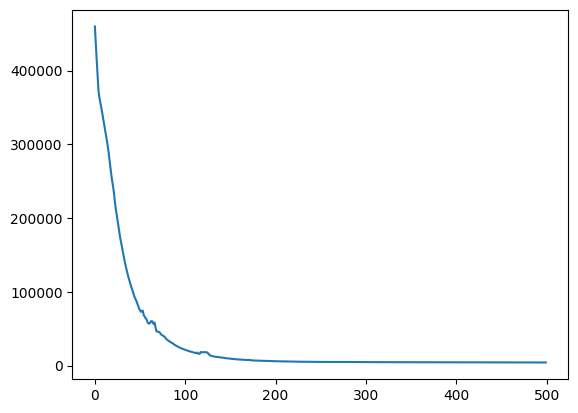

In [157]:
plt.plot(history.history['loss'])
plt.show()

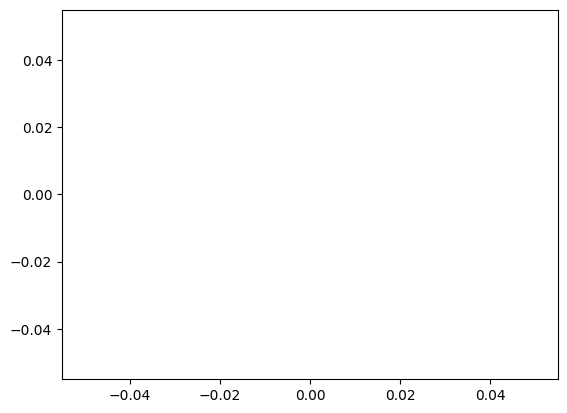

In [158]:
plt.plot(l)
plt.plot(l0)
plt.show()

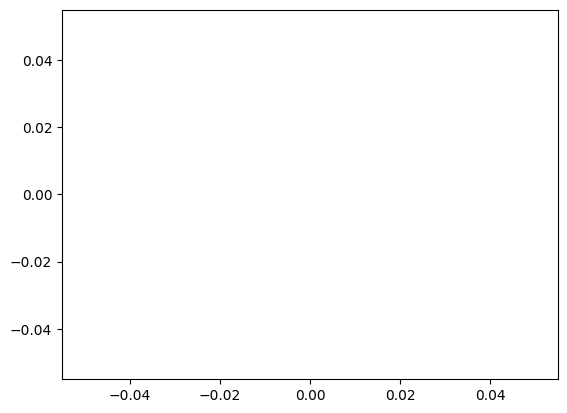

In [159]:
plt.plot(l0)

In [160]:
print(f'best epoch: {min(l0)}',f'best batch: {min(l)}')

ValueError: min() arg is an empty sequence

In [ ]:
l0[-1]

In [161]:
model.save('last.h5')

/home/itachi/miniconda3/envs/kera/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [162]:
data[index]

array([[ 828.,  635.,  918.,  512.,  612., 1025.],
       [ 625.,  676.,  738.,  597.,  597., 1046.],
       [ 518.,  740.,  440.,  779.,  565., 1046.],
       [ 488.,  821.,  390.,  884.,  527., 1035.],
       [ 488.,  880.,  471.,  908.,  508., 1015.],
       [ 449.,  817.,  312.,  890.,  543., 1048.],
       [ 558.,  689.,  660.,  582.,  591., 1004.]])

In [163]:
restore_changes(data[index],index,None)

[[[828.0, 635.0], [918.0, 512.0], [612.0, 1025.0]],
 [[625.0, 676.0], [738.0, 597.0], [597.0, 1046.0]],
 [[518.0, 740.0], [440.0, 779.0], [565.0, 1046.0]],
 [[488.0, 821.0], [390.0, 884.0], [527.0, 1035.0]],
 [[488.0, 880.0], [471.0, 908.0], [508.0, 1015.0]],
 [[449.0, 817.0], [312.0, 890.0], [543.0, 1048.0]],
 [[558.0, 689.0], [660.0, 582.0], [591.0, 1004.0]]]

In [164]:
# import cv2
# img=cv2.imread('CutFrame_Output/output0/frame_0.png')
# from utils import process_data
# import re
# from utils import list_change
# 
# data = process_data(r'CutFrame_Output/output0/use0.txt')
# data1 = list_change(r'CutFrame_Output/output0/use0.txt')
# print(data)
# print(data1)
# for p in data:
#     # print((p[0], p[1]))
#     cv2.circle(img, (int(p[0]), int(p[1])), 3, (0, 255, 0), -1)
# 
# for p in data1:
#     # print((p[0], p[1]))
#     cv2.circle(img, (int(p[0]), int(p[1])), 3, (0, 0, 255), -1)
# 
# cv2.imwrite('output.png', img)

In [165]:
# restore_changes(data[0],0)

In [166]:
model = tf.keras.models.load_model('last.h5')
# model.evaluate(X_test, Y_test)

inference part

In [167]:
index = 0

In [172]:
a= model.predict(np.array([data[index][:-1]]))

1/1 [==============================] - 0s 21ms/step


In [173]:
a[0]

array([[ 570.6273 ,  688.3506 ,  666.61804,  591.26953,  780.10297,
        1052.6096 ],
       [ 462.2625 ,  787.35693,  463.28522,  733.41003,  564.91394,
        1049.9763 ],
       [ 427.1862 ,  846.44653,  312.77277,  844.6544 ,  479.90997,
         993.444  ],
       [ 444.7405 ,  879.8957 ,  433.1706 ,  864.461  ,  564.2088 ,
        1045.5251 ],
       [ 405.6093 ,  800.4519 ,  334.80984,  867.8165 ,  515.3003 ,
        1025.6533 ],
       [ 547.9899 ,  695.4192 ,  624.91986,  662.92773,  756.90234,
         987.0529 ]], dtype=float32)

In [174]:
data[index]

array([[ 828.,  635.,  918.,  512.,  612., 1025.],
       [ 625.,  676.,  738.,  597.,  597., 1046.],
       [ 518.,  740.,  440.,  779.,  565., 1046.],
       [ 488.,  821.,  390.,  884.,  527., 1035.],
       [ 488.,  880.,  471.,  908.,  508., 1015.],
       [ 449.,  817.,  312.,  890.,  543., 1048.],
       [ 558.,  689.,  660.,  582.,  591., 1004.]])

In [176]:
points = restore_changes(a,index,None)
points_ori = restore_changes(data[index],index,None)
points = ['pass']+points
# del(points[-1])
for n,f in enumerate(points):
    if n==0:
        continue
    img = cv2.imread(f'./CutFrame_Output/output{index}/frame_{n}.png')
    for q,p in enumerate(f):
        print((p[0], p[1]))
        cv2.circle(img, (int(p[0]), int(p[1])), 3, (0, 255, 0), -1)
        cv2.putText(img, str(q), (int(p[0]), int(p[1])), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
    for q,p in enumerate(points_ori[n]):
        print((p[0], p[1]))
        cv2.circle(img, (int(p[0]), int(p[1])), 3, (255, 0, 0), -1)
        cv2.putText(img, str(q), (int(p[0]), int(p[1])), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)
    cv2.imwrite(f'outputs/output{n}.png', img)

(570.6273193359375, 688.3505859375)
(666.6180419921875, 591.26953125)
(780.1029663085938, 1052.609619140625)
(625.0, 676.0)
(738.0, 597.0)
(597.0, 1046.0)
(462.26251220703125, 787.35693359375)
(463.28521728515625, 733.4100341796875)
(564.9139404296875, 1049.976318359375)
(518.0, 740.0)
(440.0, 779.0)
(565.0, 1046.0)
(427.1861877441406, 846.446533203125)
(312.77276611328125, 844.6544189453125)
(479.90997314453125, 993.4439697265625)
(488.0, 821.0)
(390.0, 884.0)
(527.0, 1035.0)
(444.7405090332031, 879.8956909179688)
(433.17059326171875, 864.4609985351562)
(564.2088012695312, 1045.525146484375)
(488.0, 880.0)
(471.0, 908.0)
(508.0, 1015.0)
(405.60931396484375, 800.451904296875)
(334.8098449707031, 867.8165283203125)
(515.30029296875, 1025.6533203125)
(449.0, 817.0)
(312.0, 890.0)
(543.0, 1048.0)
(547.9899291992188, 695.419189453125)
(624.9198608398438, 662.927734375)
(756.90234375, 987.0529174804688)
(558.0, 689.0)
(660.0, 582.0)
(591.0, 1004.0)
